In [6]:
# Warning Ignore
import warnings
warnings.filterwarnings('ignore')

# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

# Import Evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
df_train = pd.read_csv('./fraudTrain.csv')
df_test = pd.read_csv('./fraudTest.csv')

pd.set_option('display.max_columns',None)

df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df_train.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

In [9]:
df_train.shape

(1296675, 21)

In [10]:
df_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Pisahkan data categorical dan muerical
cat_col = df_train.select_dtypes(include=['object'])

# Imputasi catergorical value
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])


# Encode untuk test
cat_col = df_test.select_dtypes(include=['object'])

for col in df_test.select_dtypes(include='object').columns:
    df_test[col] = LabelEncoder().fit_transform(df_test[col])

In [12]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,779,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,607,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,302,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,397,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,734,1325376186,38.674999,-78.632459,0


In [13]:
# Seperate X and y

X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

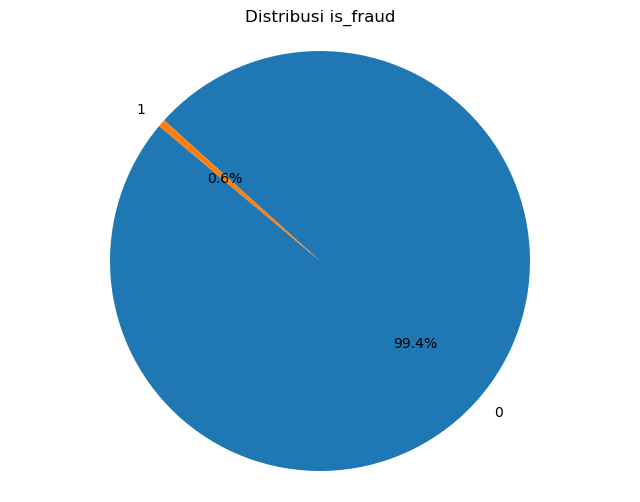

In [14]:
# Melihat distribusi target
pie = y_train.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi is_fraud')
plt.axis('equal')
plt.show()

In [15]:
X_train_re,y_train_re = SMOTE(sampling_strategy=0.7).fit_resample(X_train, y_train)

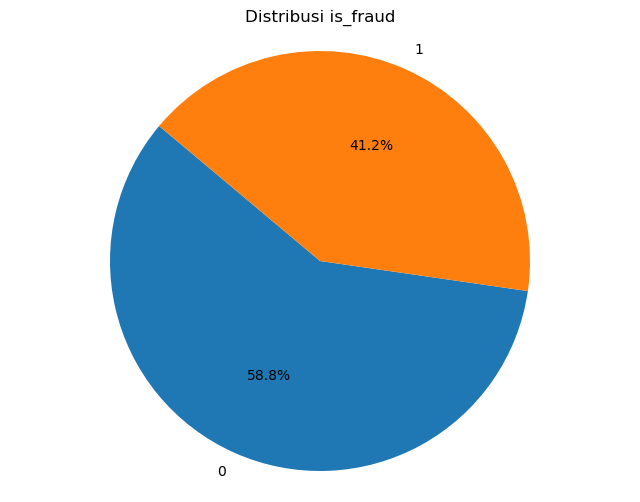

In [16]:
# Melihat distribusi target
pie = y_train_re.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi is_fraud')
plt.axis('equal')
plt.show()

In [17]:
scaler = StandardScaler()
X_train_re = scaler.fit_transform(X_train_re)
X_test = scaler.transform(X_test)

# Modeling

## Adaboost

In [18]:
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train_re,y_train_re)

pred_test = ada.predict(X_test)

In [19]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.85      0.07      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.88      0.51    555719
weighted avg       1.00      0.92      0.95    555719



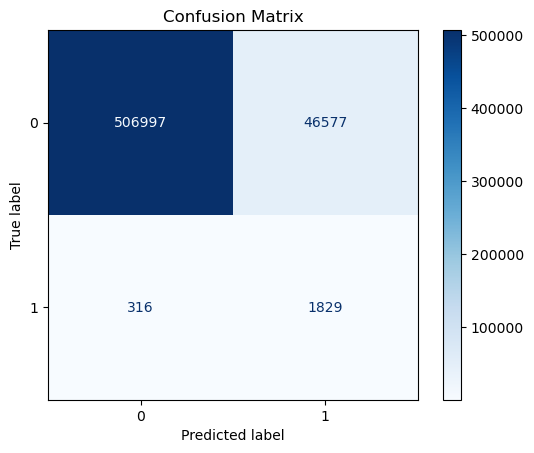

In [20]:
cm = confusion_matrix(y_test, pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression

In [21]:
log = LogisticRegression(random_state=42)

log.fit(X_train_re,y_train_re)

pred_test = log.predict(X_test)

In [22]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.30      0.35      0.32      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.67      0.66    555719
weighted avg       0.99      0.99      0.99    555719



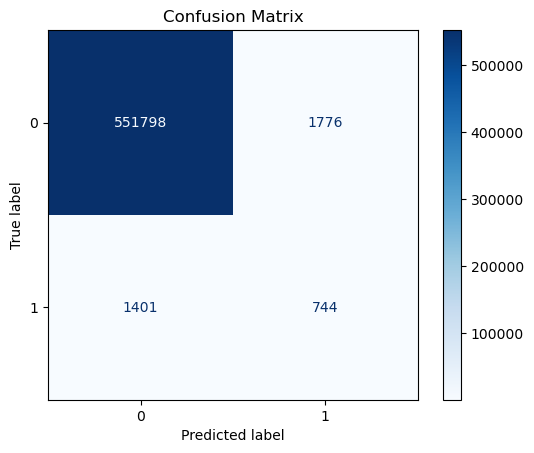

In [23]:
cm = confusion_matrix(y_test, pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Random Forest

In [24]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_re,y_train_re)

pred_test = rf.predict(X_test)

In [25]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.59      0.11      0.19      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.56      0.59    555719
weighted avg       0.99      1.00      1.00    555719



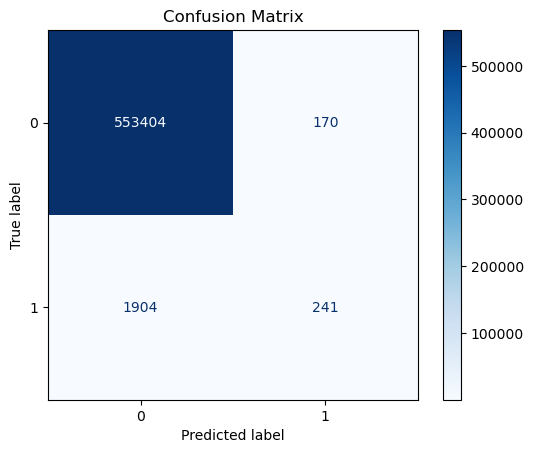

In [26]:
cm = confusion_matrix(y_test, pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()